In [ ]:
# будем отображать графики прямо в jupyter'e
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

## Caesarian data

In [ ]:
df = pd.DataFrame
df = pd.read_csv('../data/caesarian/caesarian_preprocessed.csv')
df.head()

,Unnamed: 0,Age,Heart_Problem,Caesarian,Delivery_number_1,Delivery_number_2,Delivery_number_3,Delivery_number_4,Blood_of_Pressure_0,Blood_of_Pressure_1,Blood_of_Pressure_2,Delivery_time_0,Delivery_time_1,Delivery_time_2
0,0,22,0,0,1,0,0,0,0,0,1,1,0,0
1,1,26,0,1,0,1,0,0,0,1,0,1,0,0
2,2,26,0,0,0,1,0,0,0,1,0,0,1,0
3,3,28,0,0,1,0,0,0,0,0,1,1,0,0
4,4,22,0,1,0,1,0,0,0,1,0,1,0,0


In [ ]:
del df['Unnamed: 0']
df

,Age,Heart_Problem,Caesarian,Delivery_number_1,Delivery_number_2,Delivery_number_3,Delivery_number_4,Blood_of_Pressure_0,Blood_of_Pressure_1,Blood_of_Pressure_2,Delivery_time_0,Delivery_time_1,Delivery_time_2
0,22,0,0,1,0,0,0,0,0,1,1,0,0
1,26,0,1,0,1,0,0,0,1,0,1,0,0
2,26,0,0,0,1,0,0,0,1,0,0,1,0
3,28,0,0,1,0,0,0,0,0,1,1,0,0
4,22,0,1,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,27,0,0,0,1,0,0,0,1,0,0,1,0
76,33,0,1,0,0,0,1,0,1,0,1,0,0
77,29,0,1,0,1,0,0,0,0,1,0,1,0
78,25,0,1,1,0,0,0,1,0,0,0,0,1


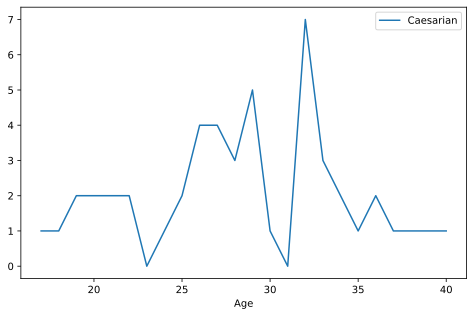

In [ ]:
df1 = df[[x for x in df.columns if 'Caesarian' in x] + ['Age']]
df1.groupby('Age').sum().plot()

По графику видно, что пик кесарева сечения происходит между 30 и 35 годами, также между 25 и 30 годами показатели относительно высокие

Посмотрим зависимости между возрастом и временем доставки в больницу

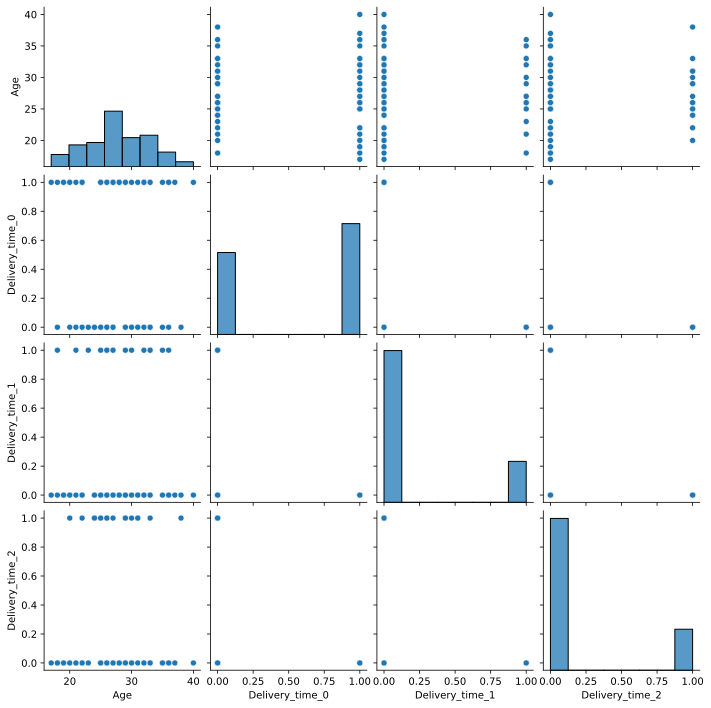

In [ ]:
sns_plot = sns.pairplot(df[['Age', 'Delivery_time_0', 'Delivery_time_1', 'Delivery_time_2']])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


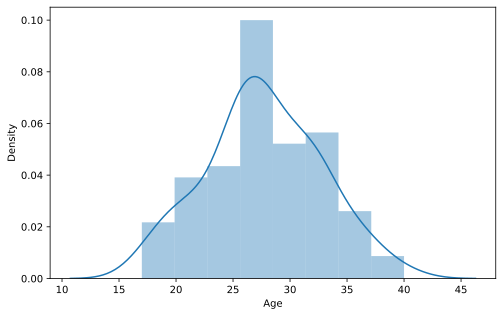

In [ ]:
sns.distplot(df.Age)

Видим что наиболее часто встречаемый возраст примерно 27 лет

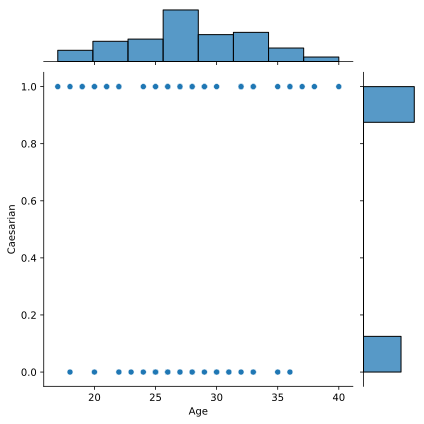

In [ ]:
sns.jointplot(y=wcd_df['Caesarian'], x=wcd_df['Age'])

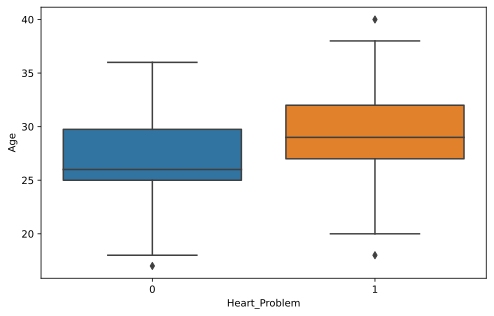

In [ ]:
sns.boxplot(x='Heart_Problem', y='Age', data=df)

## Toxicity fish preprocessed

In [ ]:
re_df = pd.DataFrame
re_df = pd.read_csv('../data/qsar/qsar_fish_toxicity_preprocessed.csv')
re_df.head()

,Unnamed: 0,CIC0,SM1_Dz,GATS1i,MLOGP,Quantitative_response,NdsCH_0,NdsCH_1,NdsCH_2,NdsCH_3,NdsCH_4,NdssC_0,NdssC_1,NdssC_2,NdssC_3,NdssC_4,NdssC_5,NdssC_6
0,0,3.260,0.829,1.676,1.453,3.770,1,0,0,0,0,0,1,0,0,0,0,0
1,1,2.189,0.580,0.863,1.348,3.115,1,0,0,0,0,1,0,0,0,0,0,0
2,2,2.125,0.638,0.831,1.348,3.531,1,0,0,0,0,1,0,0,0,0,0,0
3,3,3.027,0.331,1.472,1.807,3.510,0,1,0,0,0,1,0,0,0,0,0,0
4,4,2.094,0.827,0.860,1.886,5.390,1,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
del re_df['Unnamed: 0']
re_df

,CIC0,SM1_Dz,GATS1i,MLOGP,Quantitative_response,NdsCH_0,NdsCH_1,NdsCH_2,NdsCH_3,NdsCH_4,NdssC_0,NdssC_1,NdssC_2,NdssC_3,NdssC_4,NdssC_5,NdssC_6
0,3.260,0.829,1.676,1.453,3.770,1,0,0,0,0,0,1,0,0,0,0,0
1,2.189,0.580,0.863,1.348,3.115,1,0,0,0,0,1,0,0,0,0,0,0
2,2.125,0.638,0.831,1.348,3.531,1,0,0,0,0,1,0,0,0,0,0,0
3,3.027,0.331,1.472,1.807,3.510,0,1,0,0,0,1,0,0,0,0,0,0
4,2.094,0.827,0.860,1.886,5.390,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,2.801,0.728,2.226,0.736,3.109,1,0,0,0,0,0,0,1,0,0,0,0
904,3.652,0.872,0.867,3.983,4.040,0,0,1,0,0,0,0,0,1,0,0,0
905,3.763,0.916,0.878,2.918,4.818,1,0,0,0,0,0,0,0,0,0,0,1
906,2.831,1.393,1.077,0.906,5.317,1,0,0,0,0,0,1,0,0,0,0,0


Посмотрим на распределение химикатов CIC0 и SM1_Dz относительно результата токсичности

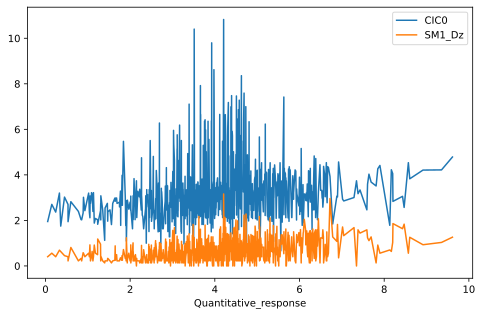

In [ ]:
re_df[['Quantitative_response', 'CIC0', 'SM1_Dz']].groupby('Quantitative_response').sum().plot()

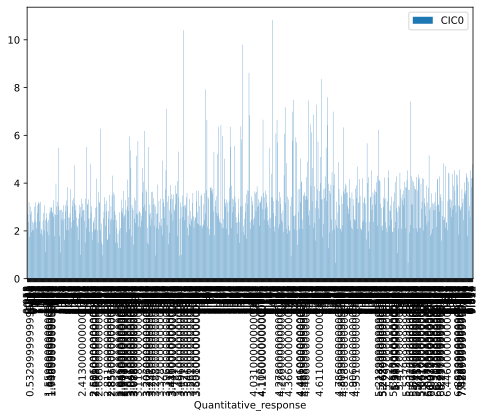

In [ ]:
re_df[['Quantitative_response', 'CIC0']].groupby('Quantitative_response').sum().plot(kind='bar')

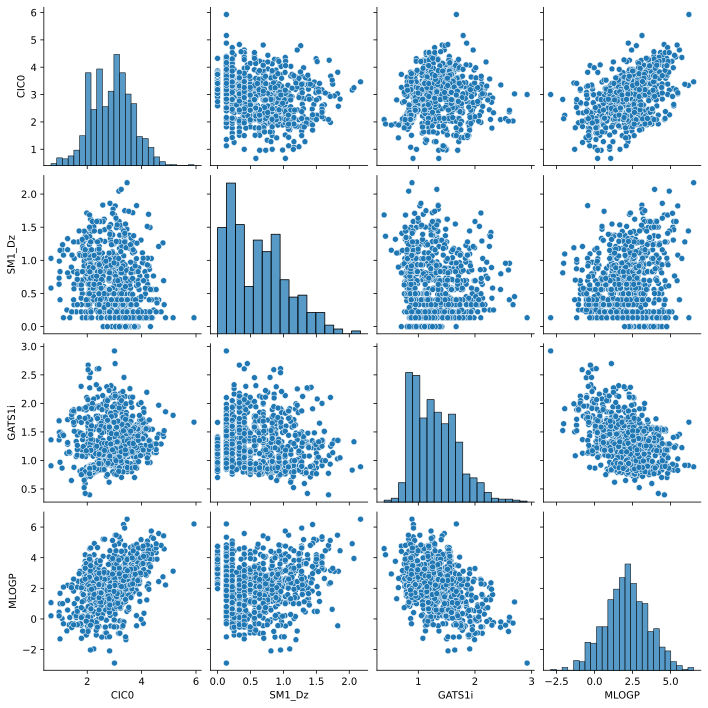

In [ ]:
sns_plot = sns.pairplot(re_df[['CIC0', 'SM1_Dz',	'GATS1i',	'MLOGP']])

На данных графиках видим зависимости токсинов

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


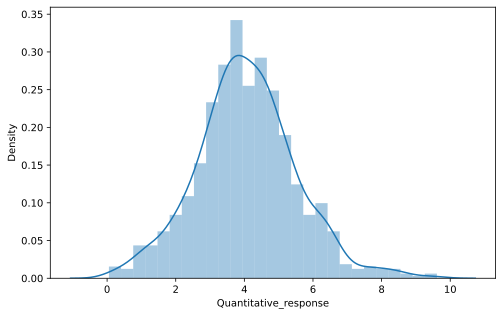

In [ ]:
sns.distplot(re_df['Quantitative_response'])

Основная часть проверяемых рыб получает оценку токсичности 4

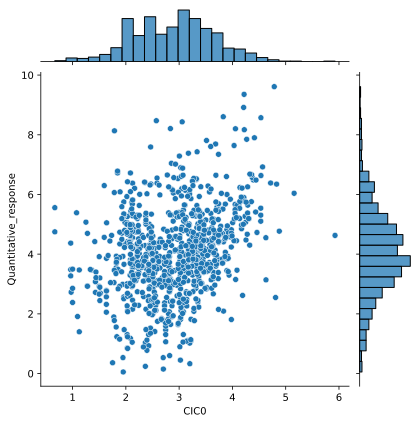

In [ ]:
sns.jointplot(y=re_df['Quantitative_response'], x=re_df['CIC0'])

Видим, что основная часть рыб, имеющая уровень CIC0 близкую к 3, получают оценку токсичности близкую к 4

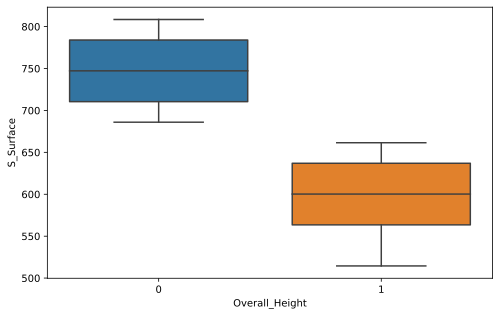

In [ ]:
sns.boxplot(y='S_Surface' , x='Overall_Height', data=re_df)

Величины прощадей, относящихся к разным высотам не пресекаются